# Zero-Shot Gemini Model Evaluation

This notebook evaluates the Gemini model predictions on the resume seniority classification task.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Load Gemini Predictions from txt file


In [2]:
# Read and parse the gemini predictions from the txt file
# Format: "1-10: Senior, Senior, Senior, Senior, Senior, Mid, Senior, Mid, Senior, Senior"

def parse_gemini_predictions(file_path):
    predictions = []
    
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            
            # Split by ": " to separate range from predictions
            parts = line.split(': ', 1)
            if len(parts) == 2:
                # Get the predictions part and split by ", "
                preds = parts[1].split(', ')
                predictions.extend(preds)
    
    return predictions

# Load predictions
gemini_preds = parse_gemini_predictions('gemini_predictions.txt')
print(f"Total predictions loaded: {len(gemini_preds)}")
print(f"First 10 predictions: {gemini_preds[:10]}")
print(f"Last 10 predictions: {gemini_preds[-10:]}")


Total predictions loaded: 2100
First 10 predictions: ['Senior', 'Senior', 'Senior', 'Senior', 'Senior', 'Mid', 'Senior', 'Mid', 'Senior', 'Senior']
Last 10 predictions: ['Senior', 'Mid', 'Senior', 'Senior', 'Senior', 'Senior', 'Senior', 'Mid', 'Mid', 'Mid']


## Load Actual Labels from CSV


In [3]:
# Load the actual labels from the CSV
df = pd.read_csv('cleaned_resumes.csv')
print(f"Total rows in CSV: {len(df)}")
print(f"\nExperience level distribution:")
print(df['experience_level'].value_counts())


Total rows in CSV: 2100

Experience level distribution:
experience_level
senior    700
mid       700
junior    700
Name: count, dtype: int64


In [4]:
# Get actual labels (lowercase to match)
actual_labels = df['experience_level'].tolist()

# Standardize predictions to lowercase for comparison
gemini_preds_lower = [p.lower().strip() for p in gemini_preds]

# Verify counts match
print(f"Number of predictions: {len(gemini_preds_lower)}")
print(f"Number of actual labels: {len(actual_labels)}")

# Trim to match if needed
min_len = min(len(gemini_preds_lower), len(actual_labels))
gemini_preds_lower = gemini_preds_lower[:min_len]
actual_labels = actual_labels[:min_len]

print(f"\nUsing {min_len} samples for evaluation")


Number of predictions: 2100
Number of actual labels: 2100

Using 2100 samples for evaluation


## Calculate Metrics


In [5]:
# Calculate overall accuracy
accuracy = accuracy_score(actual_labels, gemini_preds_lower)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Overall Accuracy: 0.3938 (39.38%)


In [6]:
# Calculate precision, recall, f1 for each class
labels = ['junior', 'mid', 'senior']

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(actual_labels, gemini_preds_lower, labels=labels, digits=4))



CLASSIFICATION REPORT
              precision    recall  f1-score   support

      junior     0.5342    0.1114    0.1844       700
         mid     0.3031    0.3057    0.3044       700
      senior     0.4287    0.7643    0.5493       700

    accuracy                         0.3938      2100
   macro avg     0.4220    0.3938    0.3460      2100
weighted avg     0.4220    0.3938    0.3460      2100



In [7]:
# Detailed metrics
print("\n" + "="*60)
print("DETAILED METRICS")
print("="*60)

precision_macro = precision_score(actual_labels, gemini_preds_lower, labels=labels, average='macro')
precision_weighted = precision_score(actual_labels, gemini_preds_lower, labels=labels, average='weighted')
recall_macro = recall_score(actual_labels, gemini_preds_lower, labels=labels, average='macro')
recall_weighted = recall_score(actual_labels, gemini_preds_lower, labels=labels, average='weighted')
f1_macro = f1_score(actual_labels, gemini_preds_lower, labels=labels, average='macro')
f1_weighted = f1_score(actual_labels, gemini_preds_lower, labels=labels, average='weighted')

print(f"\nPrecision (Macro): {precision_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"\nRecall (Macro): {recall_macro:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"\nF1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")



DETAILED METRICS

Precision (Macro): 0.4220
Precision (Weighted): 0.4220

Recall (Macro): 0.3938
Recall (Weighted): 0.3938

F1-Score (Macro): 0.3460
F1-Score (Weighted): 0.3460


## Confusion Matrix


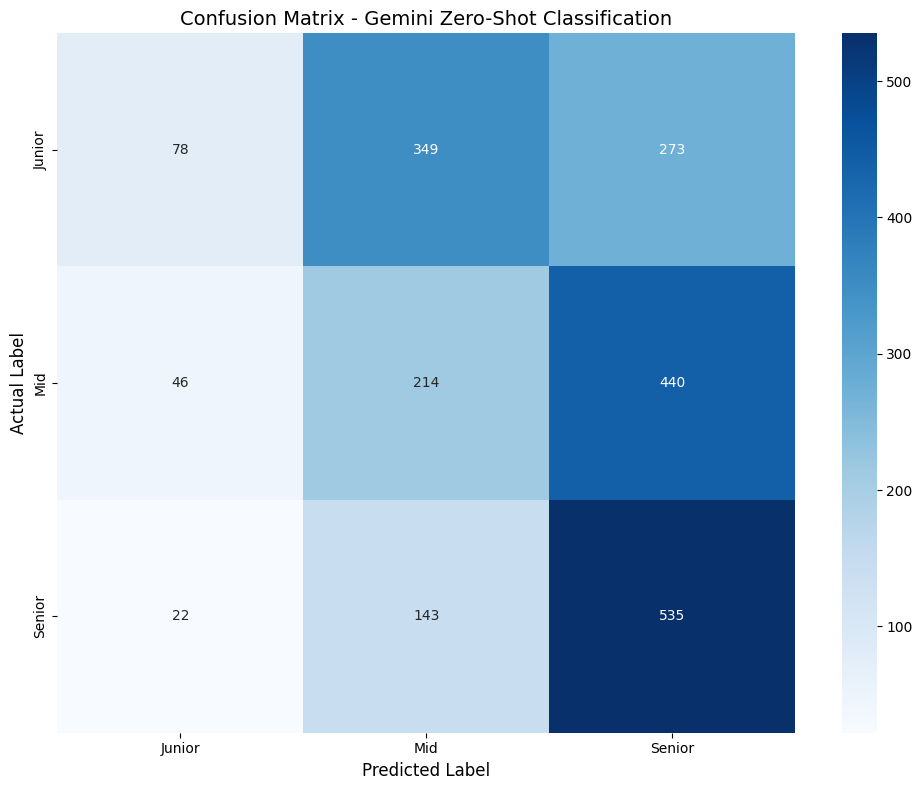


Confusion Matrix (Raw):
[[ 78 349 273]
 [ 46 214 440]
 [ 22 143 535]]


In [8]:
# Create confusion matrix
cm = confusion_matrix(actual_labels, gemini_preds_lower, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Junior', 'Mid', 'Senior'],
            yticklabels=['Junior', 'Mid', 'Senior'])
plt.title('Confusion Matrix - Gemini Zero-Shot Classification', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix (Raw):")
print(cm)


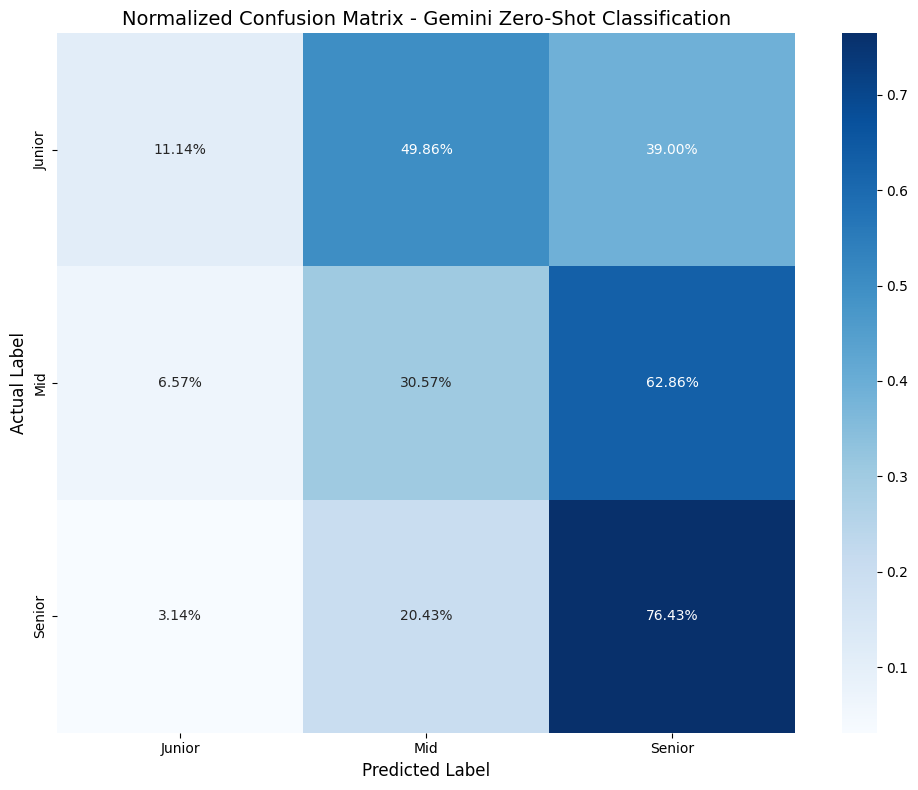

In [9]:
# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Junior', 'Mid', 'Senior'],
            yticklabels=['Junior', 'Mid', 'Senior'])
plt.title('Normalized Confusion Matrix - Gemini Zero-Shot Classification', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()


## Prediction Distribution Analysis


Prediction Distribution:
senior    1248
mid        706
junior     146
Name: count, dtype: int64

Actual Distribution:
senior    700
mid       700
junior    700
Name: count, dtype: int64


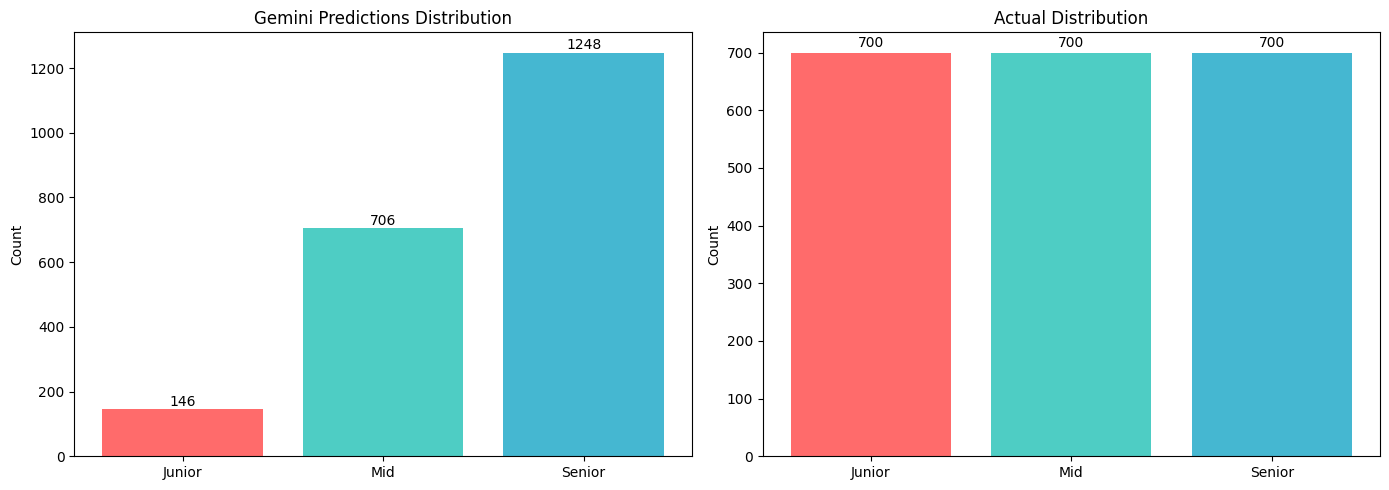

In [10]:
# Compare prediction distribution vs actual distribution
pred_counts = pd.Series(gemini_preds_lower).value_counts()
actual_counts = pd.Series(actual_labels).value_counts()

print("Prediction Distribution:")
print(pred_counts)
print(f"\nActual Distribution:")
print(actual_counts)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predictions
pred_counts_ordered = pred_counts.reindex(['junior', 'mid', 'senior'])
axes[0].bar(['Junior', 'Mid', 'Senior'], pred_counts_ordered.values, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
axes[0].set_title('Gemini Predictions Distribution', fontsize=12)
axes[0].set_ylabel('Count')
for i, v in enumerate(pred_counts_ordered.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=10)

# Actual
actual_counts_ordered = actual_counts.reindex(['junior', 'mid', 'senior'])
axes[1].bar(['Junior', 'Mid', 'Senior'], actual_counts_ordered.values, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
axes[1].set_title('Actual Distribution', fontsize=12)
axes[1].set_ylabel('Count')
for i, v in enumerate(actual_counts_ordered.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## Summary


In [11]:
print("="*60)
print("GEMINI ZERO-SHOT CLASSIFICATION SUMMARY")
print("="*60)
print(f"\nTotal Samples Evaluated: {min_len}")
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nMacro F1-Score: {f1_macro:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")
print("\n" + "="*60)


GEMINI ZERO-SHOT CLASSIFICATION SUMMARY

Total Samples Evaluated: 2100

Overall Accuracy: 0.3938 (39.38%)

Macro F1-Score: 0.3460
Weighted F1-Score: 0.3460

